ROOT Keys: ['DF_2424272862165760;1', 'DF_2424272862165760/O2hfcredcharmml;1', 'DF_2424272862165760/O2hfcredcharmtrig;1', 'DF_2424272862165760/O2hfcredflowcoll;1', 'DF_2424272862165760/O2hfcredtrkassoc;1', 'DF_2424272862165760/O2hfcredtrksel;1', 'parentFiles;1']
Reading DF_2424272862165760/O2hfcredflowcoll;1

Table: O2hfcredflowcoll
Number of entries: 563
Columns: ['fMultiplicity', 'fNumPvContrib', 'fCentrality', 'fPosZ']
Plotting fMultiplicity
Plotting fNumPvContrib
Plotting fCentrality
Plotting fPosZ


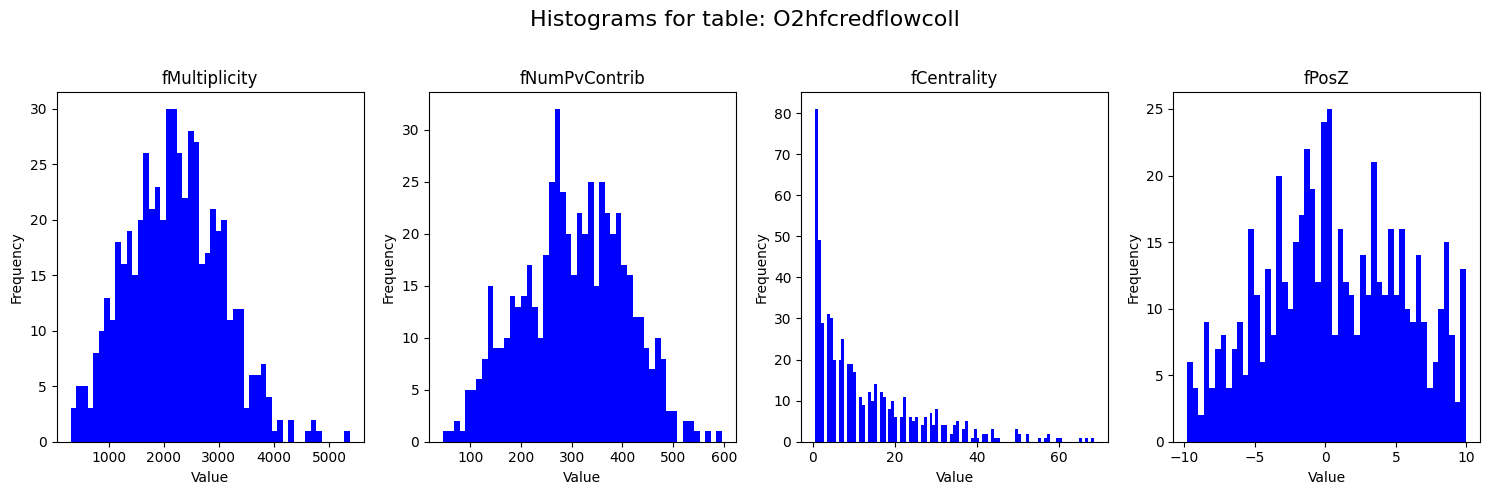

No keys found for table: O2hfcredcharmhad
Reading DF_2424272862165760/O2hfcredcharmml;1

Table: O2hfcredcharmml
Number of entries: 571
Columns: ['fIndexHfcRedCorrColls', 'fBdtScore0', 'fBdtScore1']
Plotting fIndexHfcRedCorrColls
Plotting fBdtScore0
Plotting fBdtScore1


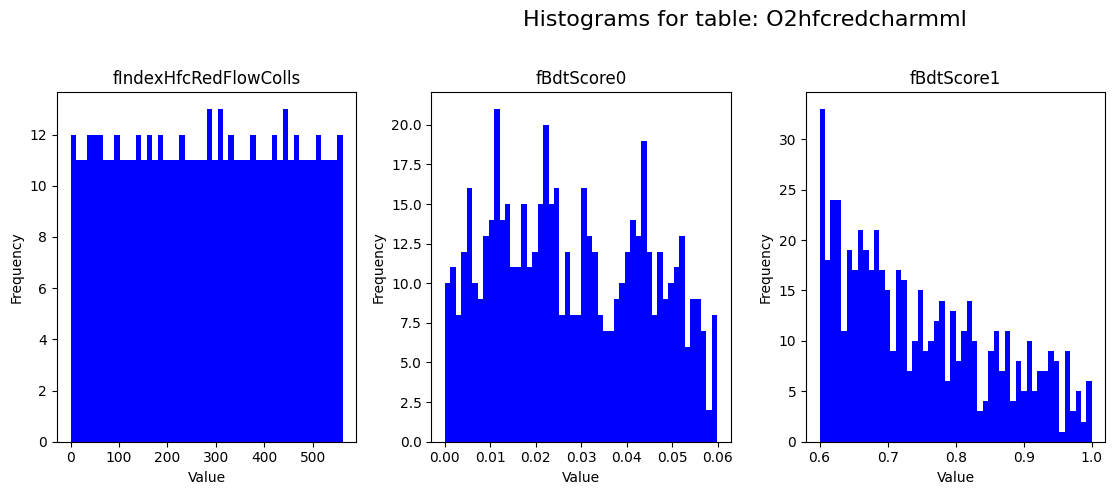

Reading DF_2424272862165760/O2hfcredtrkassoc;1

Table: O2hfcredtrkassoc
Number of entries: 74844
Columns: ['fIndexHfcRedCorrColls', 'fOriginTrackId', 'fPhiAssocTrack', 'fEtaAssocTrack', 'fPtAssocTrack']
Plotting fIndexHfcRedCorrColls
Plotting fOriginTrackId
Plotting fPhiAssocTrack
Plotting fEtaAssocTrack
Plotting fPtAssocTrack


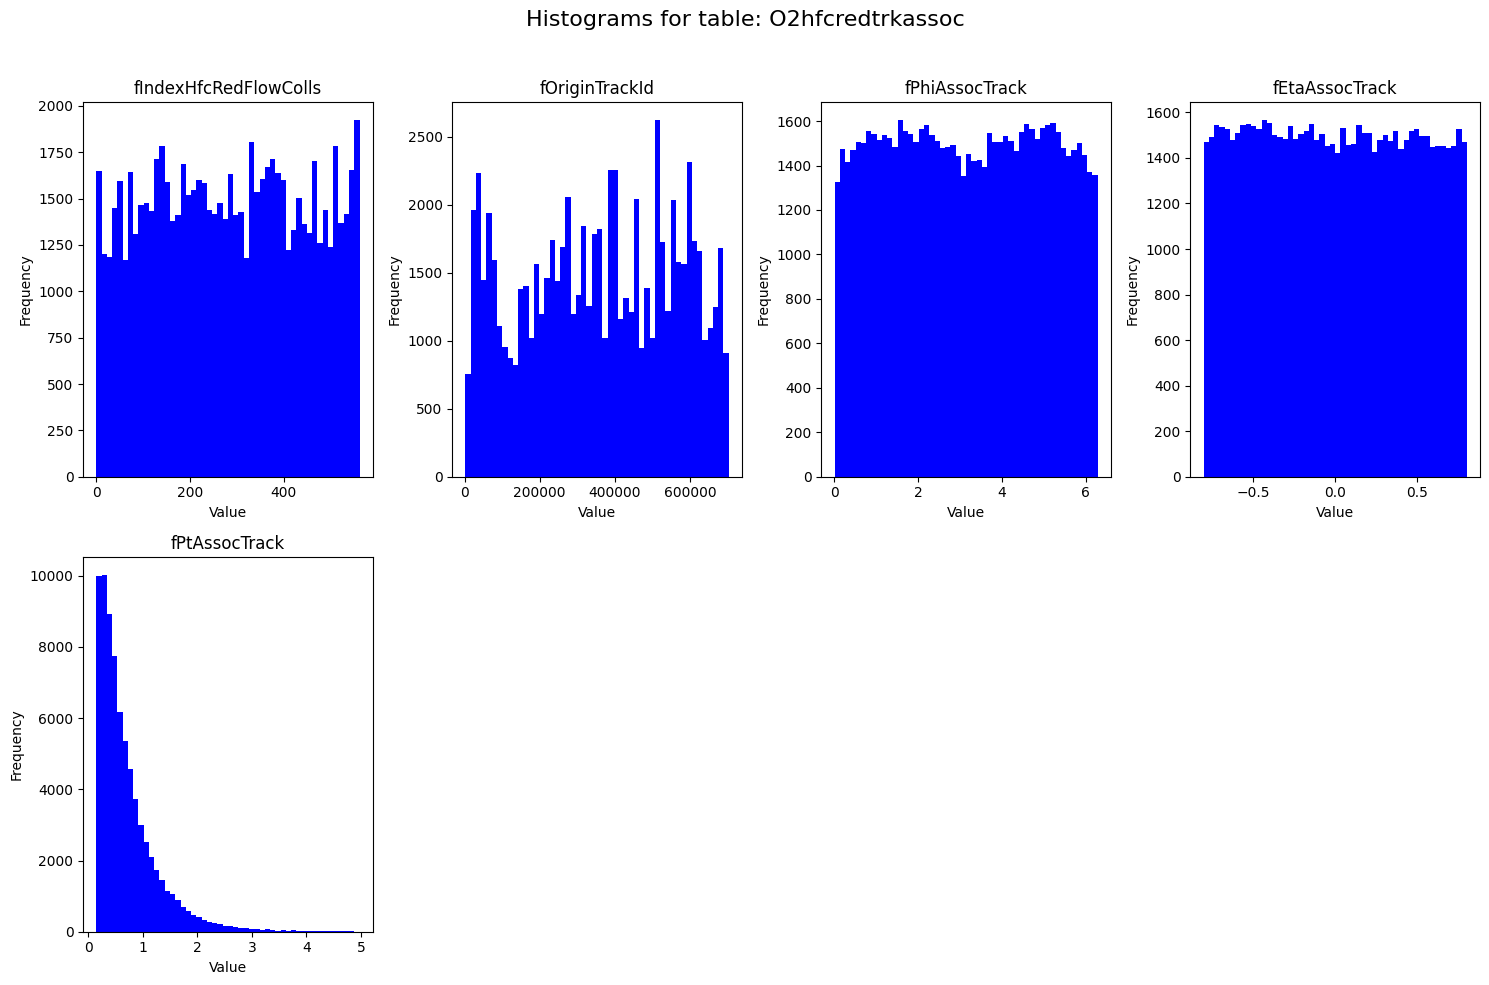

No keys found for table: O2hfcredtrksels


In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak

tables = [
    "O2hfcredflowcoll",
    "O2hfcredcharmhad",
    "O2hfcredcharmml",
    "O2hfcredtrkassoc",
    "O2hfcredtrksels",
]

with uproot.open("Tree.root") as f:
    keys = f.keys()
    print("ROOT Keys:", keys)
    
    for table in tables:
        # Filter keys that match the table name
        matched_keys = [key for key in keys if table in key]
        
        if not matched_keys:
            print(f"No keys found for table: {table}")
            continue
        
        dfs = []
        for key in matched_keys:
            print(f"Reading {key}")
            array = f[key].arrays(library="ak")  # get awkward array
            df = ak.to_dataframe(array)          # convert to pandas DataFrame
            dfs.append(df)
        
        full_df = pd.concat(dfs, ignore_index=True)
        print(f"\nTable: {table}")
        print(f"Number of entries: {len(full_df)}")
        print(f"Columns: {full_df.columns.tolist()}")
        
        # Plotting
        n_columns = len(full_df.columns)
        n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)
        
        fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
        axes = axes.flatten()

        for i, column in enumerate(full_df.columns):
            print(f"Plotting {column}")
            try:
                if 'Centrality' in column:
                    axes[i].hist(full_df[column].dropna(), bins=95, color='blue')
                else:
                    axes[i].hist(full_df[column].dropna(), bins=50, color='blue')
                axes[i].set_title(f'{column}')
                axes[i].set_xlabel('Value')
                axes[i].set_ylabel('Frequency')
                # axes[i].set_yscale('log')
            except Exception as e:
                print(f"Could not plot column {column}: {e}")
                axes[i].set_visible(False)
        
        # Remove unused axes if any
        for i in range(n_columns, len(axes)):
            fig.delaxes(axes[i])
        
        fig.suptitle(f"Histograms for table: {table}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
